# Unit 5 - Financial Planning


In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
# YOUR CODE HERE!
my_btc = 1.2
my_eth = 5.3

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [5]:
my_eth_value = requests.get(eth_url).json()
eth_price = my_eth_value['data']['1027']['quotes']['USD']['price']

In [7]:
# Fetch current BTC price
my_btc_value = requests.get(btc_url).json()
btc_price = my_btc_value['data']['1']['quotes']['CAD']['price']

# Fetch current ETH price
my_eth_value = requests.get(eth_url).json()
eth_price = my_eth_value['data']['1027']['quotes']['CAD']['price']

# Compute current value of my crpto
my_btc_value = my_btc*btc_price
my_eth_value = my_eth*eth_price

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $87443.87
The current value of your 5.3 ETH is $11960.45


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [8]:
# Current amount of shares
my_agg = 200
my_spy = 50

In [10]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
alpaca = tradeapi.REST(
alpaca_api_key,
alpaca_secret_key,api_version='v2')

In [11]:
# Format current date as ISO format
today = pd.Timestamp("2020-01-01", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
df_investments = alpaca.get_barset(
    tickers, 
    timeframe, 
    start = today).df

# Preview DataFrame
df_investments.head()

AGG                                         SPY  \
                             open     high       low   close   volume    open   
time                                                                            
2020-10-26 00:00:00-04:00  117.65  117.720  117.5900  117.64  4537207  342.13   
2020-10-27 00:00:00-04:00  117.80  117.910  117.7275  117.87  5016038  339.76   
2020-10-28 00:00:00-04:00  117.81  117.955  117.7200  117.73  5448671  332.10   
2020-10-29 00:00:00-04:00  117.76  117.770  117.4000  117.52  8093602  326.91   
2020-10-30 00:00:00-04:00  117.45  117.520  117.2200  117.23  6522417  328.28   

                                                                 
                               high     low    close     volume  
time                                                             
2020-10-26 00:00:00-04:00  342.9800  335.62  339.415   79491839  
2020-10-27 00:00:00-04:00  340.1200  337.99  338.250   50634843  
2020-10-28 00:00:00-04:00  338.2483  326.13  326.670  107939571  
2020-10-29 00:00:00-04:00  333.3950  325.09  329.990   74362731  
2020-10-30 00:00:00-04:00  329.6900  322.60  326.530   93413096

In [12]:
# Pick AGG and SPY close prices
agg_close_price = df_investments["AGG"]["close"][0]
spy_close_price = df_investments["SPY"]["close"][0]

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $117.64
Current SPY closing price: $339.415


In [13]:
# Compute the current value of shares
my_spy_value = my_spy * spy_close_price
my_agg_value = my_agg * agg_close_price

# Print current value of share
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $16970.75
The current value of your 200 AGG shares is $23528.00


### Savings Health Analysis

In [14]:
# Set monthly household income
monthly_income = 12000

# Create savings DataFrame
savings_data = [my_btc_value + my_eth_value, my_spy_value + my_agg_value]
df_savings = pd.DataFrame(savings_data, columns = ['amount'], index = ["crypto", "shares"])

# Display savings DataFrame
display(df_savings)

,amount
crypto,99404.319123
shares,40498.750000


<AxesSubplot:title={'center':'Composition of Personal Savings'}, ylabel='amount'>

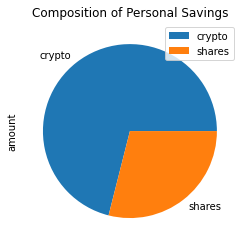

In [15]:
# Plot savings pie chart
df_savings.plot.pie(y='amount',title='Composition of Personal Savings')

In [16]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = float(df_savings.sum())

# Validate saving health
if total_savings > emergency_fund:
    print("Congratulations! You have enough money in your emergency fund.")
elif total_savings == emergency_fund: 
    print("Great, You have saved three times your monthly expenses! Keep pushing to increase your savings.")
else:
    print(f"You are ${(emergency_fund - total_savings):0.2f} away from your emergency fund goal, continue saving between 10% and 20% of your monthly income to reach your goal.")

Congratulations! You have enough money in your emergency fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [17]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2015-08-07', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2020-08-07', tz='America/New_York').isoformat()

In [18]:
# Get 5 years' worth of historical data for SPY and AGG
df_stock_data = alpaca.get_barset(
    tickers, 
    timeframe, 
    start = start_date, 
    end = end_date).df

# Display sample data
df_stock_data.head()

AGG                                        \
                             open      high       low   close    volume   
time                                                                      
2020-03-18 00:00:00-04:00  109.36  110.5700  105.7707  106.33  30173684   
2020-03-19 00:00:00-04:00  106.47  109.2200  105.5600  108.97  21031320   
2020-03-20 00:00:00-04:00  108.46  110.2399  108.4600  109.49  28449412   
2020-03-23 00:00:00-04:00  109.90  112.9400  109.0000  112.55  23873510   
2020-03-24 00:00:00-04:00  111.52  113.5000  111.0754  113.29  18141498   

                              SPY                                       
                             open      high     low   close     volume  
time                                                                    
2020-03-18 00:00:00-04:00  236.25  248.3700  228.02  241.01  256921808  
2020-03-19 00:00:00-04:00  239.25  247.3800  232.22  241.18  248430643  
2020-03-20 00:00:00-04:00  242.53  244.4700  228.50  228.94  286308782  
2020-03-23 00:00:00-04:00  228.19  229.6833  218.26  222.51  268298876  
2020-03-24 00:00:00-04:00  234.42  244.1000  233.80  243.59  203576470

In [19]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirty_years = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [0.40, 0.60],
    num_simulation = 500,
    num_trading_days = 252*30
)

In [20]:
# Printing the simulation input data
MC_thirty_years.portfolio_data.head()

AGG                                        \
                             open      high       low   close    volume   
time                                                                      
2020-03-18 00:00:00-04:00  109.36  110.5700  105.7707  106.33  30173684   
2020-03-19 00:00:00-04:00  106.47  109.2200  105.5600  108.97  21031320   
2020-03-20 00:00:00-04:00  108.46  110.2399  108.4600  109.49  28449412   
2020-03-23 00:00:00-04:00  109.90  112.9400  109.0000  112.55  23873510   
2020-03-24 00:00:00-04:00  111.52  113.5000  111.0754  113.29  18141498   

                                           SPY                            \
                          daily_return    open      high     low   close   
time                                                                       
2020-03-18 00:00:00-04:00          NaN  236.25  248.3700  228.02  241.01   
2020-03-19 00:00:00-04:00     0.024828  239.25  247.3800  232.22  241.18   
2020-03-20 00:00:00-04:00     0.004772  242.53  244.4700  228.50  228.94   
2020-03-23 00:00:00-04:00     0.027948  228.19  229.6833  218.26  222.51   
2020-03-24 00:00:00-04:00     0.006575  234.42  244.1000  233.80  243.59   

                                                   
                              volume daily_return  
time                                               
2020-03-18 00:00:00-04:00  256921808          NaN  
2020-03-19 00:00:00-04:00  248430643     0.000705  
2020-03-20 00:00:00-04:00  286308782    -0.050750  
2020-03-23 00:00:00-04:00  268298876    -0.028086  
2020-03-24 00:00:00-04:00  203576470     0.094737

In [21]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirty_years.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
1,1.024096e+00,9.913284e-01,1.009290e+00,9.678641e-01,9.919814e-01,1.005476e+00,9.936921e-01,1.008472e+00,1.008724e+00,1.007420e+00,...,9.838346e-01,1.008359e+00,9.896958e-01,1.000494e+00,1.004978e+00,9.910003e-01,1.013660e+00,1.005685e+00,1.014764e+00,1.032244e+00
2,1.013445e+00,1.001138e+00,1.007033e+00,9.670284e-01,1.009122e+00,1.010015e+00,9.876416e-01,1.018535e+00,1.024118e+00,1.001410e+00,...,9.613788e-01,1.007526e+00,9.944583e-01,9.966696e-01,1.029095e+00,9.788048e-01,1.018762e+00,1.005954e+00,9.939128e-01,1.006631e+00
3,9.886264e-01,9.852629e-01,1.001968e+00,9.612505e-01,1.018537e+00,1.024042e+00,9.890197e-01,1.018442e+00,1.019236e+00,1.011479e+00,...,9.810232e-01,1.013182e+00,1.003426e+00,1.006612e+00,1.035694e+00,9.594765e-01,1.023055e+00,9.970469e-01,1.011785e+00,1.045169e+00
4,1.018569e+00,9.930806e-01,1.001914e+00,9.432967e-01,1.034796e+00,1.038548e+00,1.004900e+00,1.005957e+00,1.034203e+00,1.039277e+00,...,9.765029e-01,1.016062e+00,1.012468e+00,1.020275e+00,1.020626e+00,9.390190e-01,1.004723e+00,9.849195e-01,1.008134e+00,1.058726e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,6.371482e+08,4.476663e+08,7.466990e+07,9.073734e+07,4.645383e+07,8.953881e+07,4.852642e+08,1.274300e+08,3.375152e+07,1.193476e+09,...,5.832460e+07,9.265963e+07,2.399399e+08,1.264186e+07,7.107032e+07,1.329925e+09,3.304576e+07,6.182888e+08,1.755092e+08,1.148128e+08
7557,6.537852e+08,4.583250e+08,7.442403e+07,9.002026e+07,4.588789e+07,8.971111e+07,4.841889e+08,1.291391e+08,3.378888e+07,1.198271e+09,...,5.792046e+07,9.114932e+07,2.418266e+08,1.256843e+07,7.122539e+07,1.334169e+09,3.303302e+07,6.232222e+08,1.739471e+08,1.163280e+08
7558,6.507955e+08,4.540616e+08,7.457758e+07,9.053765e+07,4.612895e+07,8.762453e+07,4.903985e+08,1.285594e+08,3.419139e+07,1.197045e+09,...,5.726184e+07,9.135867e+07,2.426770e+08,1.289271e+07,7.281507e+07,1.336104e+09,3.235502e+07,6.262464e+08,1.766342e+08,1.172385e+08
7559,6.540282e+08,4.529460e+08,7.514210e+07,8.997204e+07,4.527068e+07,8.593903e+07,4.937386e+08,1.280816e+08,3.366934e+07,1.191104e+09,...,5.664338e+07,9.084955e+07,2.402433e+08,1.287427e+07,7.409132e+07,1.321178e+09,3.301473e+07,6.340276e+08,1.807370e+08,1.200531e+08


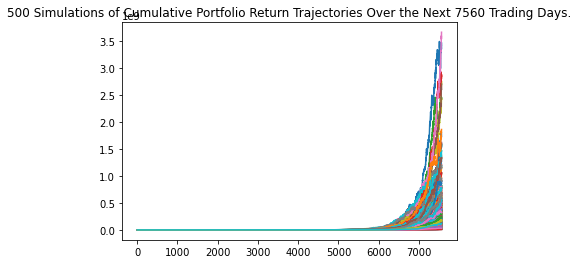

In [22]:
# Plot simulation outcomes
line_plot = MC_thirty_years.plot_simulation()

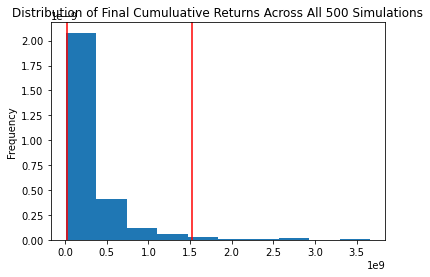

In [23]:
# Plot probability distribution and confidence intervals
dist_plot = MC_thirty_years.plot_distribution()

### Retirement Analysis

In [24]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_thirty_years.summarize_cumulative_return()

# Print summary statistics
tbl

count           5.000000e+02
mean            3.130300e+08
std             4.339736e+08
min             8.064899e+06
25%             7.805536e+07
50%             1.731104e+08
75%             3.640417e+08
max             3.662893e+09
95% CI Lower    2.099534e+07
95% CI Upper    1.524962e+09
Name: 7560, dtype: float64

### Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a `$20,000` initial investment.

In [25]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(tbl[8] * initial_investment,2)
ci_upper = round(tbl[9] * initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $419906864216.63 and $30499244886512.8


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [26]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
# YOUR CODE HERE!
ci_lower = round(tbl[8] * initial_investment,2)
ci_upper = round(tbl[9] * initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $629860296324.95 and $45748867329769.2


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [29]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_five_years = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [0.80, 0.20],
    num_simulation = 500,
    num_trading_days = 252*5
)

In [30]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_five_years.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.004963,1.004528,1.011420,1.010061,1.006456,0.998871,0.992408,0.999870,1.001917,1.004615,...,1.002040,0.989384,1.016730,1.007958,1.013439,1.004112,1.010041,1.002986,1.001383,0.988209
2,1.010185,1.016723,1.013445,0.998655,1.006049,1.001257,0.987197,1.005615,1.008069,1.006126,...,1.003255,0.987554,1.026725,1.011315,1.008987,1.006655,1.022721,1.003094,1.005852,0.996620
3,1.010269,1.008467,1.017457,0.999148,1.006939,1.004251,0.986929,1.005843,1.007272,1.002175,...,1.002372,0.985172,1.022211,1.005771,1.015272,1.011229,1.021073,1.006198,1.002674,0.989618
4,1.006336,1.008973,1.017693,0.996038,1.014267,0.994316,0.984206,1.022831,1.005047,0.991567,...,0.997180,0.988474,1.030266,1.007775,1.004146,1.002504,1.022537,1.006252,0.996076,0.987402
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,8.264595,11.649258,6.090492,8.802305,6.683949,7.451921,6.991429,10.923936,8.618091,7.723054,...,11.604219,5.734507,6.820614,11.033678,8.500499,5.754187,10.529601,8.495900,8.411948,5.370810
1257,8.225281,11.677297,6.045089,8.883826,6.669745,7.541872,7.036730,11.111672,8.667938,7.658472,...,11.646511,5.790808,6.877878,11.153691,8.491358,5.776103,10.596711,8.455378,8.378862,5.333634
1258,8.170711,11.769048,6.152267,8.975031,6.688112,7.515582,7.051938,11.101327,8.729481,7.652433,...,11.651983,5.740593,6.899874,11.117992,8.535224,5.778308,10.565005,8.509844,8.376895,5.389471
1259,8.152047,11.866117,6.194740,8.956241,6.684640,7.494442,7.082810,11.175271,8.686789,7.680089,...,11.602533,5.748033,6.858820,11.184838,8.517878,5.797308,10.542876,8.540092,8.349816,5.400048


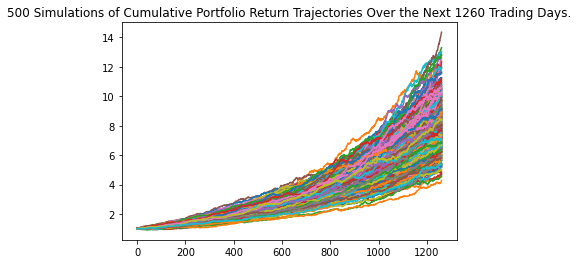

In [31]:
# Plot simulation outcomes
line_plot = MC_five_years.plot_simulation()

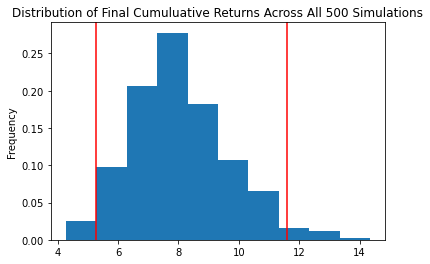

In [33]:
# Plot probability distribution and confidence intervals
dist_plot = MC_five_years.plot_distribution()

In [34]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_five_years.summarize_cumulative_return()

# Print summary statistics
tbl

count           500.000000
mean              8.043647
std               1.627571
min               4.270796
25%               6.923794
50%               7.825758
75%               9.055759
max              14.352320
95% CI Lower      5.274370
95% CI Upper     11.598639
Name: 1260, dtype: float64

In [35]:
# Set initial investment
initial_investment = 20000*3

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(tbl[8] * initial_investment,2)
ci_upper = round(tbl[9] * initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")


There is a 95% chance that an initial investment of $60000 in the portfolio over the next 30 years will end within in the range of $316462.18 and $695918.37


### Ten Years Retirement Option

In [36]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_ten_years = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [0.80, 0.20],
    num_simulation = 500,
    num_trading_days = 252*10
)

In [37]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_ten_years.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.004030,0.996094,0.992867,0.997118,0.999145,1.000126,1.010174,0.998738,1.005400,0.999050,...,0.998761,1.002132,0.999825,1.002749,1.010069,1.003486,0.991402,1.010457,1.002524,0.999009
2,0.997910,1.000680,0.993248,1.001896,1.004328,0.998770,1.007554,1.001625,1.005860,1.007877,...,0.999711,1.003709,0.994379,1.002904,1.011581,1.000915,0.996808,1.015631,1.012022,0.999202
3,1.003548,0.994986,0.987890,0.995002,1.008110,1.001228,1.002775,1.005590,1.013313,1.006938,...,1.002224,0.997254,0.995218,1.006526,1.009534,1.009207,0.996774,1.012645,0.999451,0.998801
4,1.004580,1.000190,0.989395,1.005973,0.999729,1.001970,1.006078,1.011450,1.009737,1.005714,...,1.013463,1.005303,0.998918,1.020738,1.011378,1.018019,0.992027,1.016215,0.987017,1.008752
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,54.475937,63.732508,69.963757,63.660928,65.595136,55.217433,44.651651,64.284228,49.493793,40.100317,...,115.954870,106.469371,79.739522,72.182025,65.646845,49.702181,41.465895,46.227782,70.005551,48.988087
2517,54.246161,64.501456,70.393171,64.006349,66.480959,55.441967,44.785948,64.597962,50.023638,40.066145,...,116.706655,107.489296,79.845789,72.906348,65.913682,49.687142,42.020683,46.649539,69.911828,49.158269
2518,54.667479,64.065621,70.136482,64.127428,66.761982,55.682841,44.859782,65.319200,50.524782,39.914217,...,117.568475,106.739135,80.337300,73.000441,66.121957,50.427993,42.132546,46.350937,69.722477,49.603629
2519,54.289059,63.963028,70.381598,64.231938,67.281489,55.912092,44.808083,66.091220,50.732250,40.181961,...,117.700329,107.478952,80.507587,73.433457,66.296651,50.787830,42.556219,46.153619,69.872815,49.504613


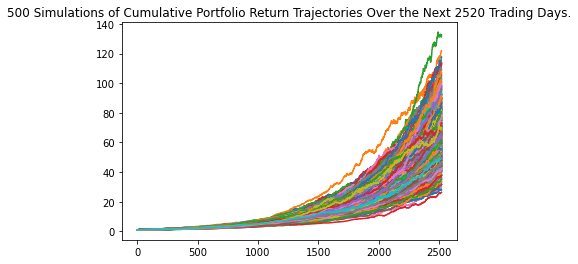

In [39]:
# Plot simulation outcomes
line_plot= MC_ten_years.plot_simulation()

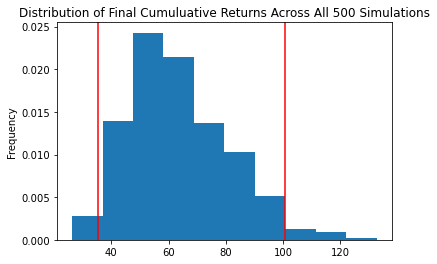

In [40]:
# Plot probability distribution and confidence intervals
dist_plot_ten = MC_ten_years.plot_distribution()

In [42]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl_ten = MC_ten_years.summarize_cumulative_return()

# Print summary statistics
tbl_ten

count           500.000000
mean             63.625920
std              17.423060
min              26.349262
25%              50.524285
50%              61.908825
75%              73.311397
max             132.579781
95% CI Lower     35.348530
95% CI Upper    100.746065
Name: 2520, dtype: float64

In [45]:
# Set initial investment
initial_investment = 2000 * 3

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(tbl_ten[8]*initial_investment,2)
ci_upper_ten = round(tbl_ten[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $6000 in the portfolio over the next 10 years will end within in the range of $212091.18 and $604476.39
